## Verify Ground Truth ##

Given cut-out regions from brightfield images, paired with MPM images, verify the location of the MPM region within the brightfield image. Ground Truth coordinates taken from the annotated brightfield images are read from a csv file and mapped to the location within the cut-out regions by subtracting the location of the cut-out (from another csv).

In [194]:
import numpy as np
import matplotlib.pyplot as plt #requires Pillow to read tiffs
from skimage.color import rgb2gray
from PIL import Image
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score


In [10]:
brightfield_folder = '/media/jo/Data_NTFS/rois/'
brightfield_filename = '%d_%d.tif' #substitute slide number and region id

mpm_folder = '../data/processed/'
mpm_filename = '%d_%d_gs.tif' #substitute slide number and region id

roi_metadatafile = brightfield_folder + 'roi_locations.csv'
gt_metadatafile = './gt_roi_locations.csv'

In [5]:
roi_locations = np.genfromtxt(roi_metadatafile, delimiter=',', dtype=None, encoding="utf8")
roi_locations = roi_locations.astype(int) #Convert to integers

gt_positions = np.genfromtxt(gt_metadatafile, delimiter=',', dtype=None, encoding="utf8")
gt_positions = gt_positions[1:].astype(int) #Drop header row, convert to integers

For each region in roi_locations, open the corresponding brightfield and MPM images and register.

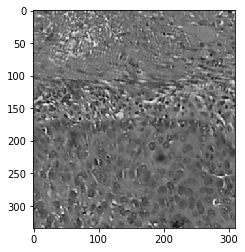

(512, 512, 4)
255
30


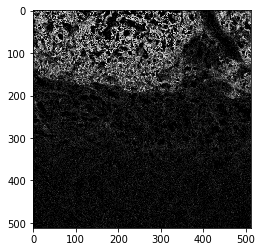

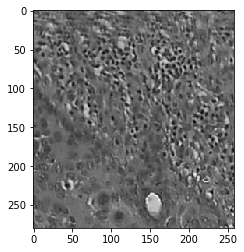

(512, 512, 4)
255
16


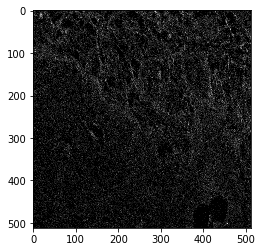

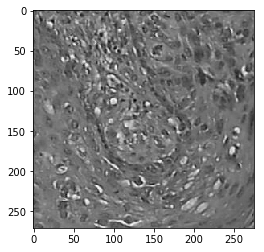

(512, 512, 4)
255
15


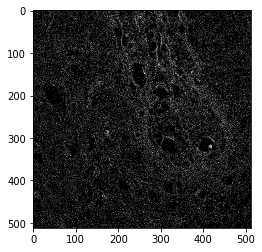

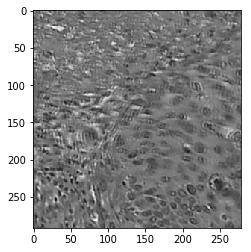

(512, 512, 4)
255
30


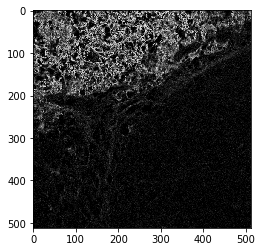

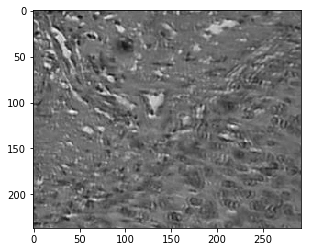

(512, 512, 4)
255
28


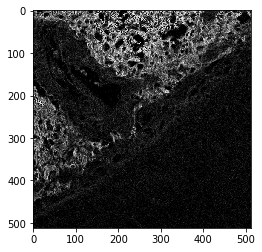

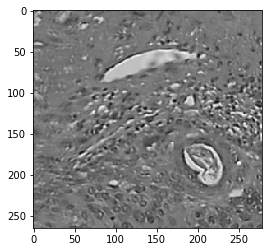

(512, 512, 4)
255
32


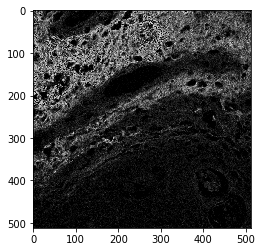

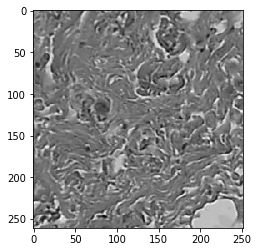

MPM image not found for region 7 of slide 148184


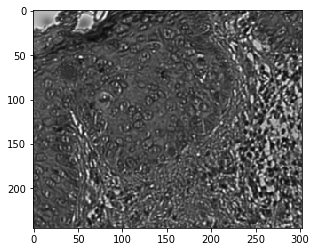

(512, 512, 4)
255
32


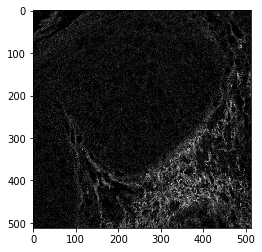

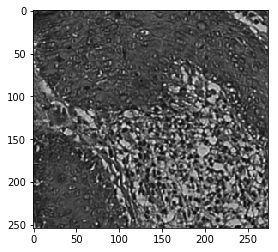

(512, 512, 4)
255
21


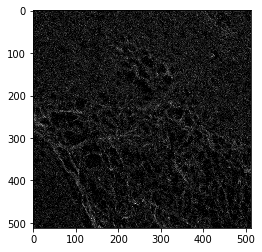

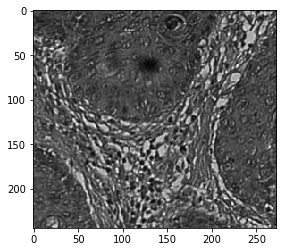

(512, 512, 4)
255
34


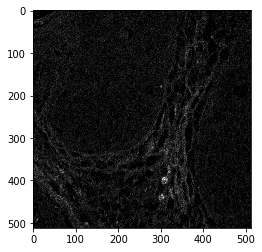

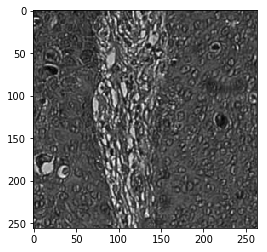

(512, 512, 4)
255
26


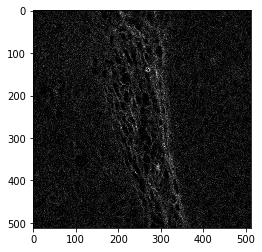

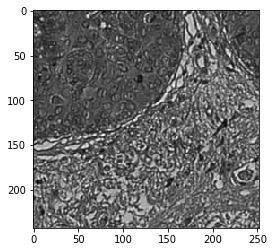

(512, 512, 4)
255
28


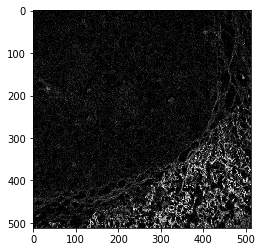

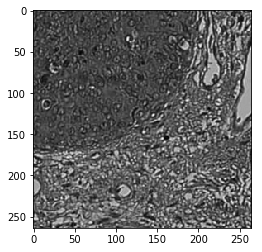

(512, 512, 4)
255
28


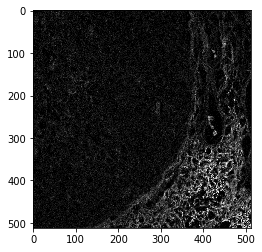

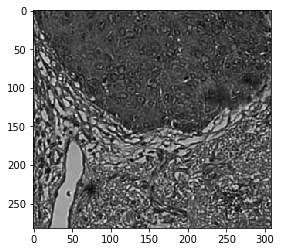

(512, 512, 4)
255
30


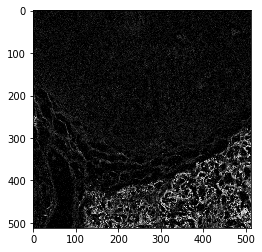

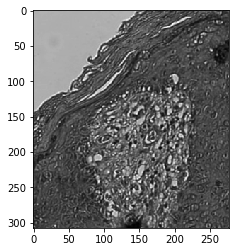

(512, 512, 4)
255
26


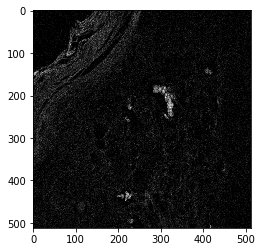

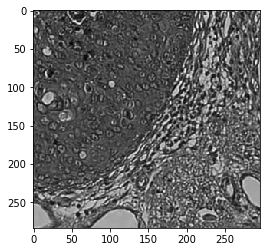

(512, 512, 4)
255
26


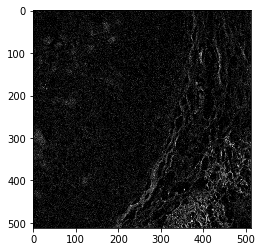

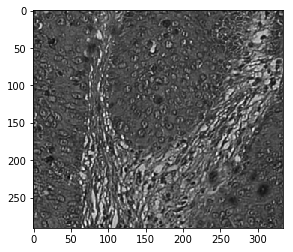

(512, 512, 4)
255
26


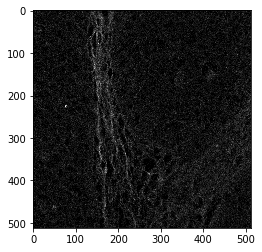

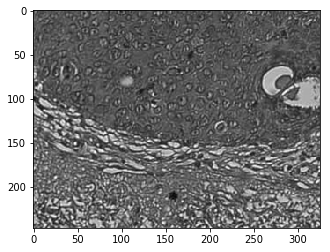

(512, 512, 4)
255
28


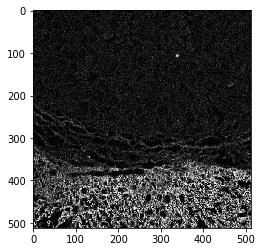

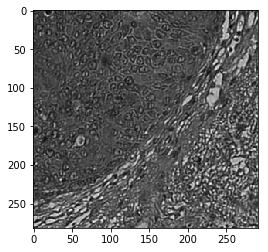

(512, 512, 4)
255
32


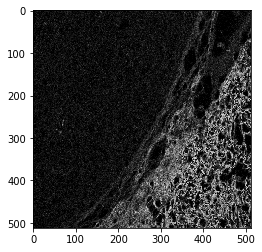

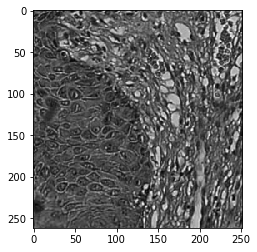

(512, 512, 4)
255
28


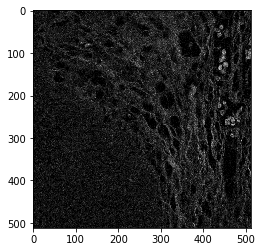

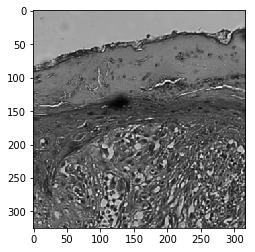

(512, 512, 4)
255
21


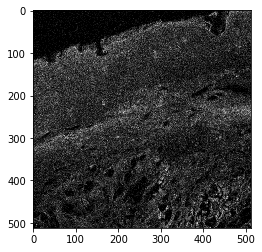

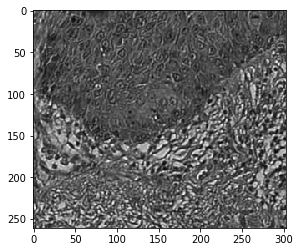

(512, 512, 4)
255
29


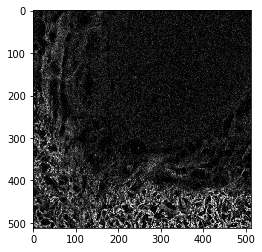

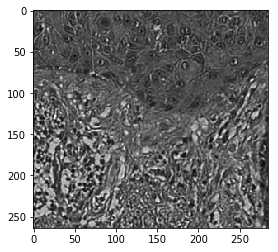

(512, 512, 4)
255
40


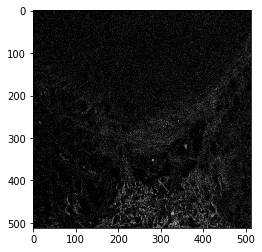

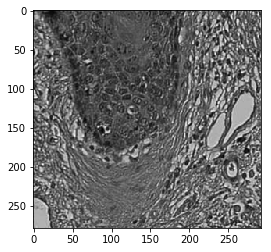

(512, 512, 4)
255
28


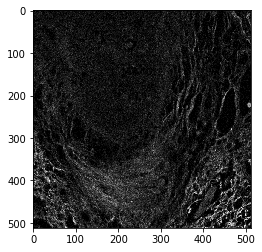

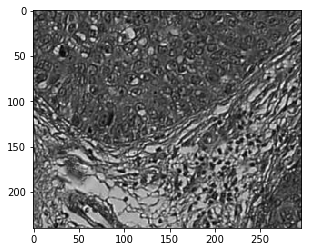

(512, 512, 4)
255
26


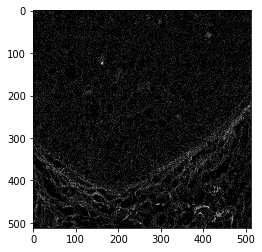

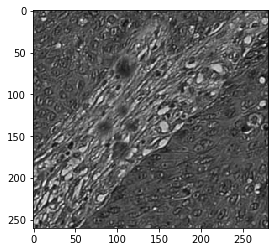

(512, 512, 4)
255
24


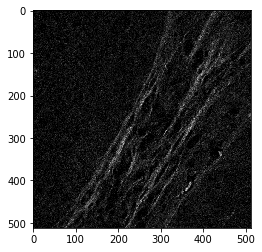

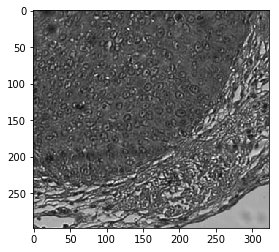

(512, 512, 4)
255
30


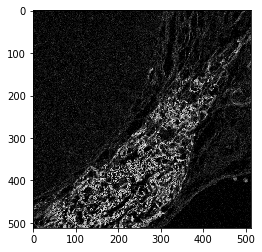

In [151]:
for region in roi_locations:
    slide_id = region[0]
    region_id = region[1]
    region_coords = (region[2:4], region[4:])
    #print("Registering images for region %d on slide %d with coords %r"%(region_id, slide_id, region_coords))
    try:
        ref_im = plt.imread(brightfield_folder+brightfield_filename%(slide_id,region_id))
    except:
        print("Brightfield image not found for region %d of slide %d"%(region_id, slide_id))
        continue
    ref_im = np.rint(rgb2gray(ref_im)*255.).astype('uint8')
    plt.imshow(ref_im, cmap='gray')
    plt.show()
    
    try:
        flo_im = plt.imread(mpm_folder+mpm_filename%(slide_id,region_id))
    except:
        print("MPM image not found for region %d of slide %d"%(region_id, slide_id))
        continue
    print(flo_im.shape)
    print(np.max(flo_im))
    flo_im = np.rint(rgb2gray(flo_im)*255.).astype('uint8')
    print(np.max(flo_im))
    plt.imshow(flo_im, cmap='gray')
    plt.show()
    

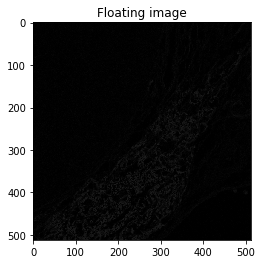

Finding maximum MI on a grid of (20 x 20 x 40 x 40) = 640000 points
New max found at scale (0.291, 0.315) and translation (-100.000, -108.000)
Ranges: (0, 0, 298, 323) (100, 108, 62, 41)
Overlap pixels: (62, 41)
MI: 0.1467 	AMI: -0.0020


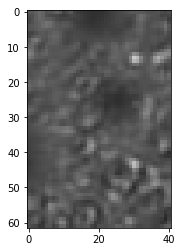

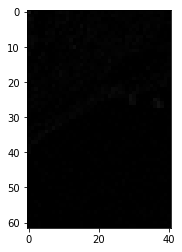

New max found at scale (0.291, 0.315) and translation (-100.000, -102.000)
Ranges: (0, 0, 298, 323) (100, 102, 62, 47)
Overlap pixels: (62, 47)
MI: 0.1791 	AMI: 0.0024


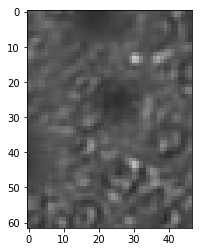

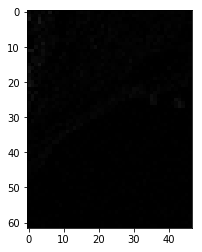

New max found at scale (0.291, 0.315) and translation (-100.000, -97.000)
Ranges: (0, 0, 298, 323) (100, 97, 62, 52)
Overlap pixels: (62, 52)
MI: 0.1858 	AMI: -0.0016


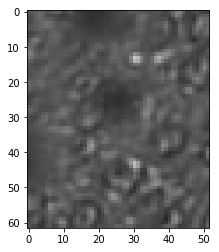

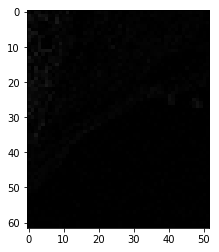

New max found at scale (0.291, 0.315) and translation (-100.000, -91.000)
Ranges: (0, 0, 298, 323) (100, 91, 62, 58)
Overlap pixels: (62, 58)
MI: 0.2058 	AMI: -0.0026


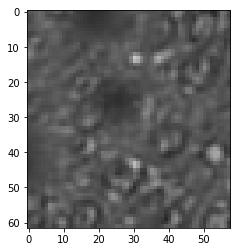

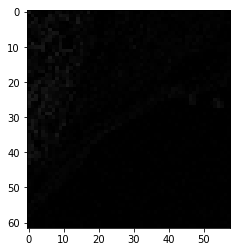

New max found at scale (0.291, 0.315) and translation (-100.000, -86.000)
Ranges: (0, 0, 298, 323) (100, 86, 62, 63)
Overlap pixels: (62, 63)
MI: 0.2081 	AMI: -0.0041


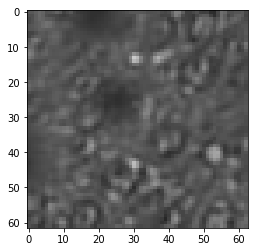

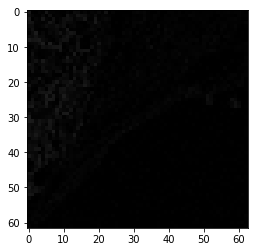

New max found at scale (0.291, 0.315) and translation (-100.000, -80.000)
Ranges: (0, 0, 298, 323) (100, 80, 62, 69)
Overlap pixels: (62, 69)
MI: 0.2148 	AMI: -0.0028


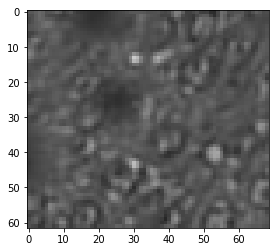

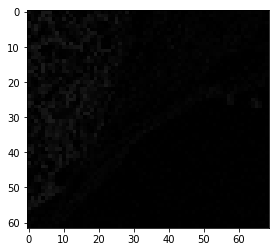

New max found at scale (0.291, 0.315) and translation (-100.000, -75.000)
Ranges: (0, 0, 298, 323) (100, 75, 62, 74)
Overlap pixels: (62, 74)
MI: 0.2242 	AMI: 0.0010


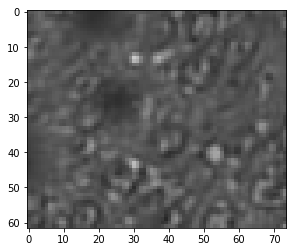

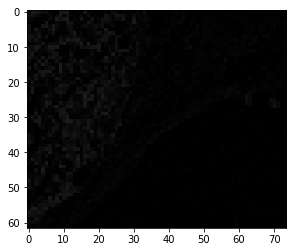

New max found at scale (0.291, 0.315) and translation (-100.000, -53.000)
Ranges: (0, 0, 298, 323) (100, 53, 62, 96)
Overlap pixels: (62, 96)
MI: 0.2081 	AMI: 0.0026


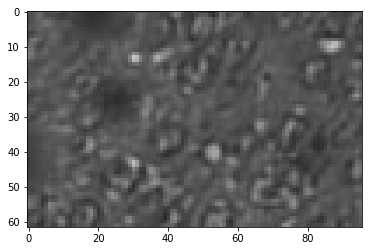

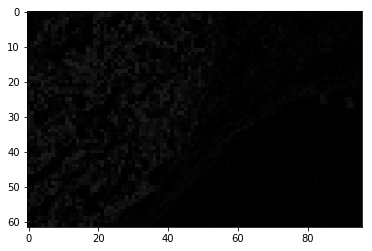

New max found at scale (0.291, 0.315) and translation (-95.000, 41.000)
Ranges: (0, 41, 298, 282) (95, 0, 67, 149)
Overlap pixels: (67, 149)
MI: 0.1481 	AMI: 0.0027


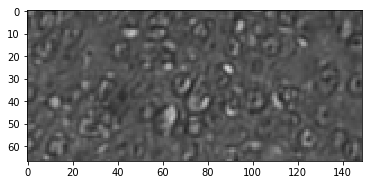

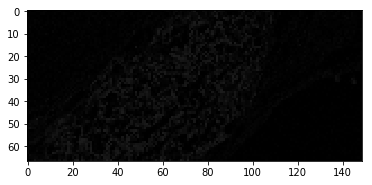

New max found at scale (0.291, 0.315) and translation (-95.000, 57.000)
Ranges: (0, 57, 298, 266) (95, 0, 67, 149)
Overlap pixels: (67, 149)
MI: 0.1508 	AMI: 0.0033


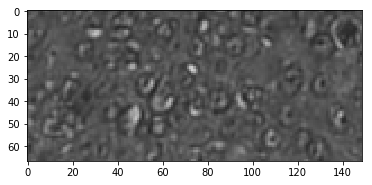

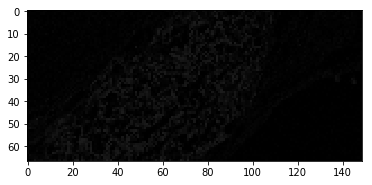

New max found at scale (0.291, 0.315) and translation (-85.000, -64.000)
Ranges: (0, 0, 298, 323) (85, 64, 77, 85)
Overlap pixels: (77, 85)
MI: 0.1936 	AMI: 0.0034


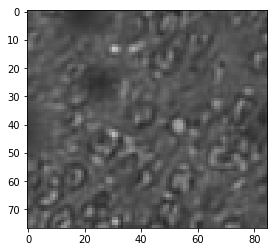

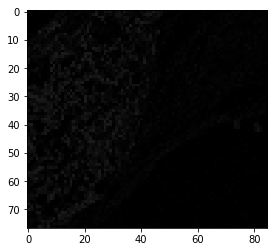

New max found at scale (0.291, 0.315) and translation (-85.000, -58.000)
Ranges: (0, 0, 298, 323) (85, 58, 77, 91)
Overlap pixels: (77, 91)
MI: 0.1915 	AMI: 0.0044


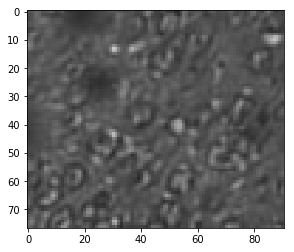

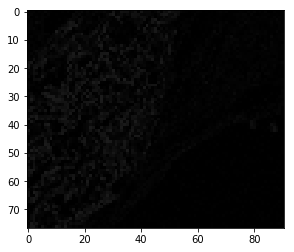

Grid point 1000 of 640000 (0.2%)
Grid point 2000 of 640000 (0.3%)
Grid point 3000 of 640000 (0.5%)
New max found at scale (0.291, 0.365) and translation (84.000, -9.000)
Ranges: (84, 0, 214, 323) (0, 9, 187, 140)
Overlap pixels: (187, 140)
MI: 0.0946 	AMI: 0.0049


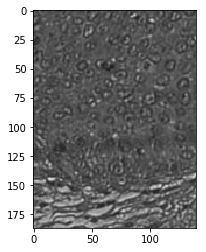

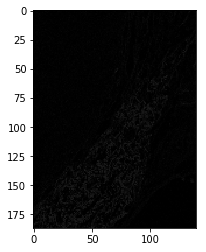

New max found at scale (0.291, 0.365) and translation (94.000, -53.000)
Ranges: (94, 0, 204, 323) (0, 53, 187, 96)
Overlap pixels: (187, 96)
MI: 0.1266 	AMI: 0.0049


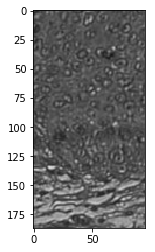

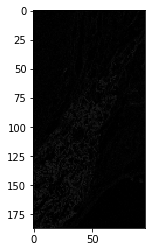

New max found at scale (0.291, 0.365) and translation (94.000, -31.000)
Ranges: (94, 0, 204, 323) (0, 31, 187, 118)
Overlap pixels: (187, 118)
MI: 0.1141 	AMI: 0.0058


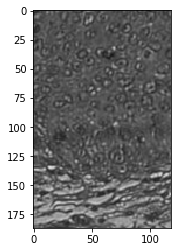

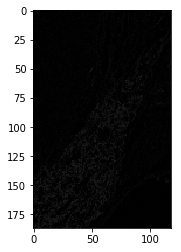

Grid point 4000 of 640000 (0.6%)
Grid point 5000 of 640000 (0.8%)
Grid point 6000 of 640000 (0.9%)
New max found at scale (0.291, 0.465) and translation (58.000, -108.000)
Ranges: (58, 0, 240, 323) (0, 108, 238, 41)
Overlap pixels: (238, 41)
MI: 0.1573 	AMI: 0.0066


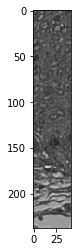

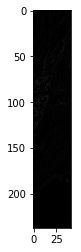

New max found at scale (0.291, 0.465) and translation (63.000, -108.000)
Ranges: (63, 0, 235, 323) (0, 108, 238, 41)
Overlap pixels: (235, 41)
MI: 0.1623 	AMI: 0.0070


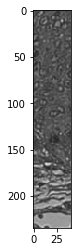

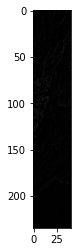

Grid point 7000 of 640000 (1.1%)
Grid point 8000 of 640000 (1.2%)
New max found at scale (0.291, 0.564) and translation (7.000, -108.000)
Ranges: (7, 0, 291, 323) (0, 108, 289, 41)
Overlap pixels: (289, 41)
MI: 0.1422 	AMI: 0.0073


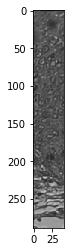

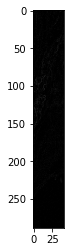

Grid point 9000 of 640000 (1.4%)
Grid point 10000 of 640000 (1.6%)
New max found at scale (0.291, 0.614) and translation (-18.000, -108.000)
Ranges: (0, 0, 298, 323) (18, 108, 296, 41)
Overlap pixels: (296, 41)
MI: 0.1406 	AMI: 0.0073


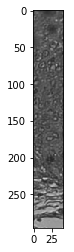

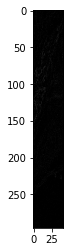

Grid point 11000 of 640000 (1.7%)


KeyboardInterrupt: 

In [199]:
def gridSearchMIRegister(ref, flo):
    mi_scores=[]
    ami_scores=[]
    max_mi = -1
    max_ami = -1
    ctr=0
    
    plt.imshow(flo, cmap='gray', vmin=0, vmax=255)
    plt.title("Floating image")
    plt.show()

    flo2 = Image.fromarray(flo, mode='L') #Make a copy rather than affecting the passed in data, also convert to an Image
    
    init_scaling = np.array([len(ref)/len(flo), len(ref[0])/len(flo[0])]) #initialise scaling by assuming whole region is covered
    init_transl = [0, 0] #initialise translation as zero
    
    #Set up search grid
    max_scaling = init_scaling * 2.
    min_scaling = init_scaling / 2.
    scaling_steps = 20
#     print('Scaling grid from (%.3f,%.3f) to (%.3f,%.3f) in %d steps'%(*min_scaling, *max_scaling, scaling_steps))
    
    max_transl = [ref.shape[0]//3, ref.shape[1]//3]
    min_transl = [-ref.shape[0]//3, -ref.shape[1]//3]
    transl_steps = 40
    xtrans = np.rint(np.linspace(min_transl[0], max_transl[0], transl_steps)).astype(int)
    ytrans = np.rint(np.linspace(min_transl[1], max_transl[1], transl_steps)).astype(int)
    
    xscaling = np.linspace(min_scaling[0], max_scaling[0], scaling_steps)
    yscaling = np.linspace(min_scaling[1], max_scaling[1], scaling_steps)

    pts = len(xscaling)*len(yscaling)*len(xtrans)*len(ytrans)
    print("Finding maximum MI on a grid of (%d x %d x %d x %d) = %d points"%\
          (len(xscaling), len(yscaling), len(xtrans), len(ytrans), \
           pts))
    for x in xscaling:
        for y in yscaling:

            newsize = np.rint((x * len(flo), y * len(flo[0]))).astype(int)
            rescaled_flo = flo2.resize(newsize)
#             print("Calculating MI with scaling (%.3f, %.3f) giving flo image size %r"%(x, y, newsize))
            rescaled_flo = np.asarray(rescaled_flo)
#             plt.imshow(rescaled_flo, cmap='gray', vmin=0, vmax=255)
#             plt.title("Rescaled floating image")
#             plt.show()
#             print(rescaled_flo.shape)
            
            for xt in xtrans:
                for yt in ytrans:
                    ctr += 1
                    if not ctr%1000:
                        print('Grid point %d of %d (%2.1f%%)'%(ctr, pts, 100*ctr/pts))
#                     print("Translating by (%d, %d)"%(xt, yt))
#                     transformed_flo = np.zeros((newsize[1], newsize[0]))
                    if xt > 0 and yt > 0:
                        ref_range = (xt, yt, ref.shape[0]-xt, ref.shape[1]-yt)
                        flo_range = (0, 0, rescaled_flo.shape[0], rescaled_flo.shape[1])
#                         transformed_flo[xt:,yt:] = rescaled_flo[:-xt,:-yt]
                    elif xt > 0:
                        ref_range = (xt, 0, ref.shape[0]-xt, ref.shape[1])
                        flo_range = (0, -yt, rescaled_flo.shape[0], rescaled_flo.shape[1]+yt)
#                         transformed_flo[xt:,:yt] = rescaled_flo[:-xt,-yt:]
                    elif yt > 0:
                        ref_range = (0, yt, ref.shape[0], ref.shape[1]-yt)
                        flo_range = (-xt, 0, rescaled_flo.shape[0]+xt, rescaled_flo.shape[1])
#                         transformed_flo[:xt,yt:] = rescaled_flo[-xt:,:-yt]
                    else:
                        ref_range = (0, 0, ref.shape[0], ref.shape[1])
                        flo_range = (-xt, -yt, rescaled_flo.shape[0]+xt, rescaled_flo.shape[1]+yt)
#                         transformed_flo[:xt,:yt] = rescaled_flo[-xt:,-yt:]
#                     plt.imshow(transformed_flo, cmap='gray', vmin=0, vmax=255)
#                     plt.show()

#                     overlap = (min(transformed_flo.shape[0], ref.shape[0]), min(transformed_flo.shape[1], ref.shape[1]))
                    overlap = (min(ref_range[2], flo_range[2]), min(ref_range[3], flo_range[3]))

                    mi = mutual_info_score(ref[ref_range[0]:(overlap[0]+ref_range[0]), ref_range[1]:(overlap[1]+ref_range[1])].flatten(), \
                                           rescaled_flo[flo_range[0]:(overlap[0]+flo_range[0]), flo_range[1]:(overlap[1]+flo_range[1])].flatten())
                    ami = adjusted_mutual_info_score(ref[ref_range[0]:(overlap[0]+ref_range[0]), ref_range[1]:(overlap[1]+ref_range[1])].flatten(), \
                                           rescaled_flo[flo_range[0]:(overlap[0]+flo_range[0]), flo_range[1]:(overlap[1]+flo_range[1])].flatten())
#                     print("MI score is: %.4f"%mi)
                    if mi > max_mi or ami > max_ami:
                        if mi > max_mi:
                            max_mi = mi
                            mi_max_at = (x, y, xt, yt)
                        if ami > max_ami:
                            max_ami = ami
                            ami_max_at = (x, y, xt, yt)
                        print("New max found at scale (%.3f, %.3f) and translation (%.3f, %.3f)"%(x, y, xt, yt))
                        print('Ranges:', ref_range, flo_range)
                        print('Overlap pixels:',overlap)
                        print('MI: %.4f \tAMI: %.4f'%(mi, ami))
                        plt.imshow(ref[ref_range[0]:(overlap[0]+ref_range[0]), ref_range[1]:(overlap[1]+ref_range[1])], cmap='gray', vmin=0, vmax=255)
                        plt.show()
                        plt.imshow(rescaled_flo[flo_range[0]:(overlap[0]+flo_range[0]), flo_range[1]:(overlap[1]+flo_range[1])], cmap='gray', vmin=0, vmax=255)
                        plt.show()
                    mi_scores.append(mi)
                    ami_scores.append(ami)
        
    return mi_scores, mi_max_at, ami_scores, ami_max_at
    
mi_scores, mi_max_at, ami_scores, ami_max_at = gridSearchMIRegister(ref_im, flo_im)

In [6]:
roi_locations

array([[148184,      1,   3309,   1933,   3619,   2267],
       [148184,      2,   3593,   2024,   3851,   2304],
       [148184,      3,   3798,   2244,   4073,   2515],
       [148184,      4,   3817,   1835,   4096,   2127],
       [148184,      5,   3942,   1695,   4234,   1932],
       [148184,      6,   4200,   1532,   4479,   1797],
       [148184,      7,   2798,    540,   3051,    801],
       [148185,      1,   1001,   1349,   1304,   1594],
       [148185,      2,   1804,   1061,   2078,   1315],
       [148185,      3,   2319,    935,   2592,   1179],
       [148185,      4,   2661,    858,   2924,   1114],
       [148185,      5,   2597,   1125,   2850,   1368],
       [148185,      6,   2903,   1054,   3168,   1318],
       [148185,      7,   3135,    857,   3443,   1139],
       [148185,      8,   3222,    235,   3499,    543],
       [148185,      9,   3613,    685,   3909,    969],
       [148185,     10,   3757,    421,   4091,    712],
       [148185,     11,   3962,

In [7]:
gt_positions

array([[148184,      1,   3342,   1979,   3584,   2217,    243,    239],
       [148184,      2,   3626,   2060,   3817,   2276,    192,    217],
       [148184,      3,   3839,   2284,   4030,   2477,    192,    194],
       [148184,      4,   3844,   1866,   4068,   2094,    225,    229],
       [148184,      5,   3973,   1740,   4200,   1900,    228,    161],
       [148184,      6,   4235,   1569,   4449,   1756,    215,    188],
       [148184,      7,   2837,    581,   3013,    763,    177,    183],
       [148185,      1,   1046,   1389,   1257,   1562,    212,    174],
       [148185,      2,   1837,   1107,   2045,   1281,    209,    175],
       [148185,      3,   2346,    966,   2557,   1150,    212,    185],
       [148185,      4,   2691,    887,   2889,   1087,    199,    201],
       [148185,      5,   2625,   1160,   2814,   1333,    190,    174],
       [148185,      6,   2942,   1094,   3122,   1271,    181,    178],
       [148185,      7,   3164,    892,   3404,   1